In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
df = pd.read_csv('advertising.csv')
df.sample(5)

,TV,Radio,Newspaper,Sales
80,76.4,26.7,22.3,11.8
18,69.2,20.5,18.3,11.3
81,239.8,4.1,36.9,17.3
16,67.8,36.6,114.0,12.5
161,85.7,35.8,49.3,13.3


In [6]:
df.duplicated().sum()

0

There are no duplicate values in this dataset.

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no missing values in this data set.

In [9]:
df.shape

(200, 4)

This dataset contain 200 rows and 4 columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


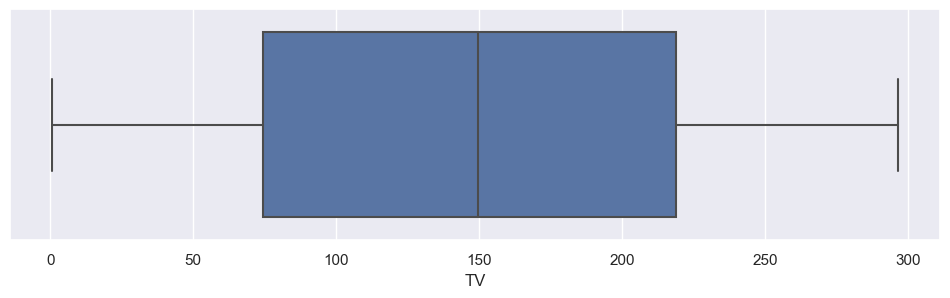

In [26]:
sns.set()
plt.figure(figsize = (12, 3))
sns.boxplot(df['TV'])
plt.show()

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


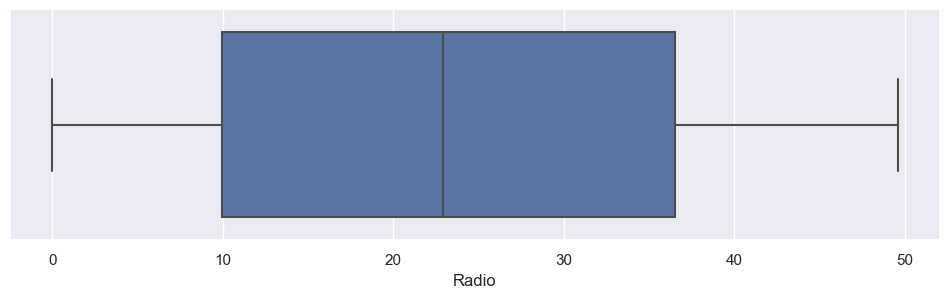

In [29]:
sns.set()
plt.figure(figsize = (12, 3))
sns.boxplot(df['Radio'])
plt.show()

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


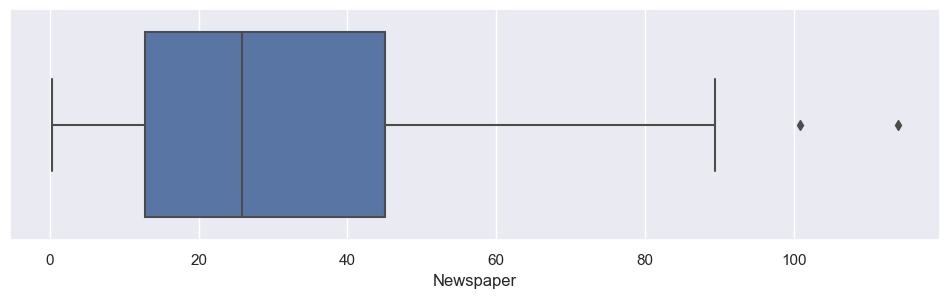

In [30]:
sns.set()
plt.figure(figsize = (12, 3))
sns.boxplot(df['Newspaper'])
plt.show()

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


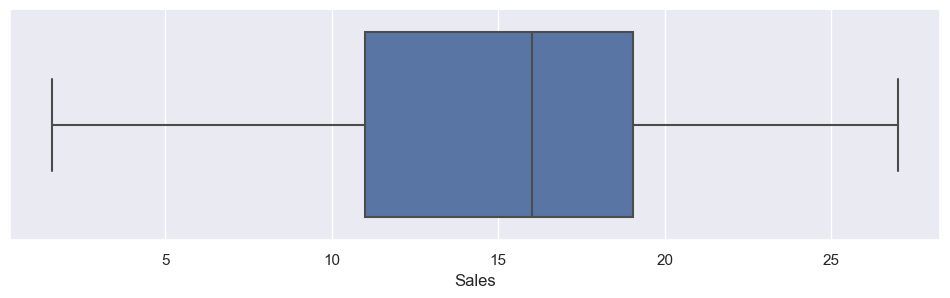

In [31]:
sns.set()
plt.figure(figsize = (12, 3))
sns.boxplot(df['Sales'])
plt.show()

There are no outlier values present in dataset.

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

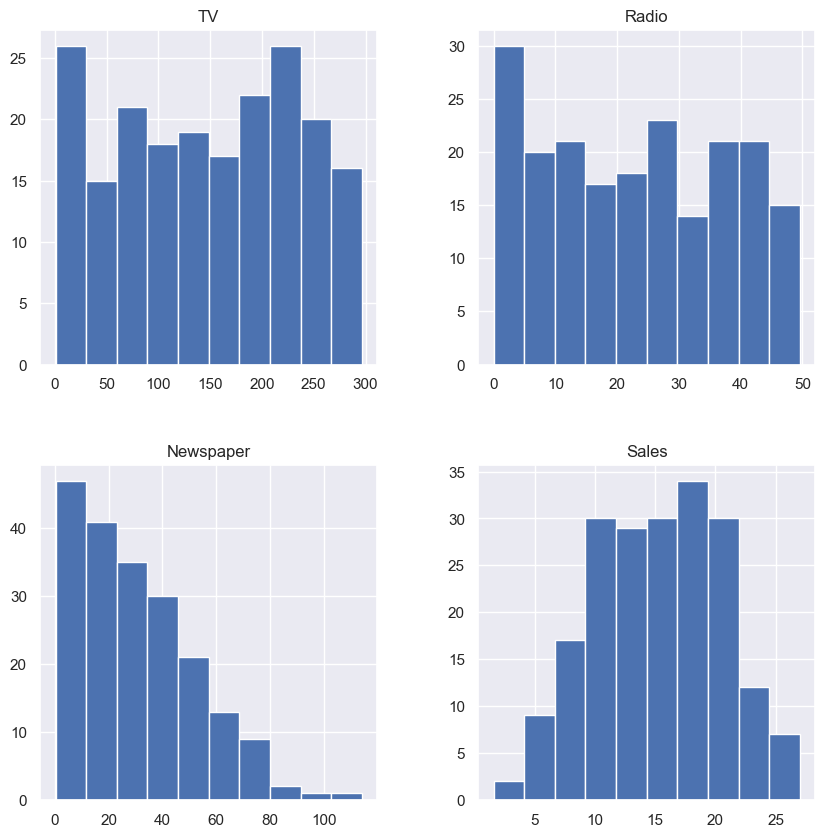

In [37]:
df.hist(figsize = (10, 10))

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


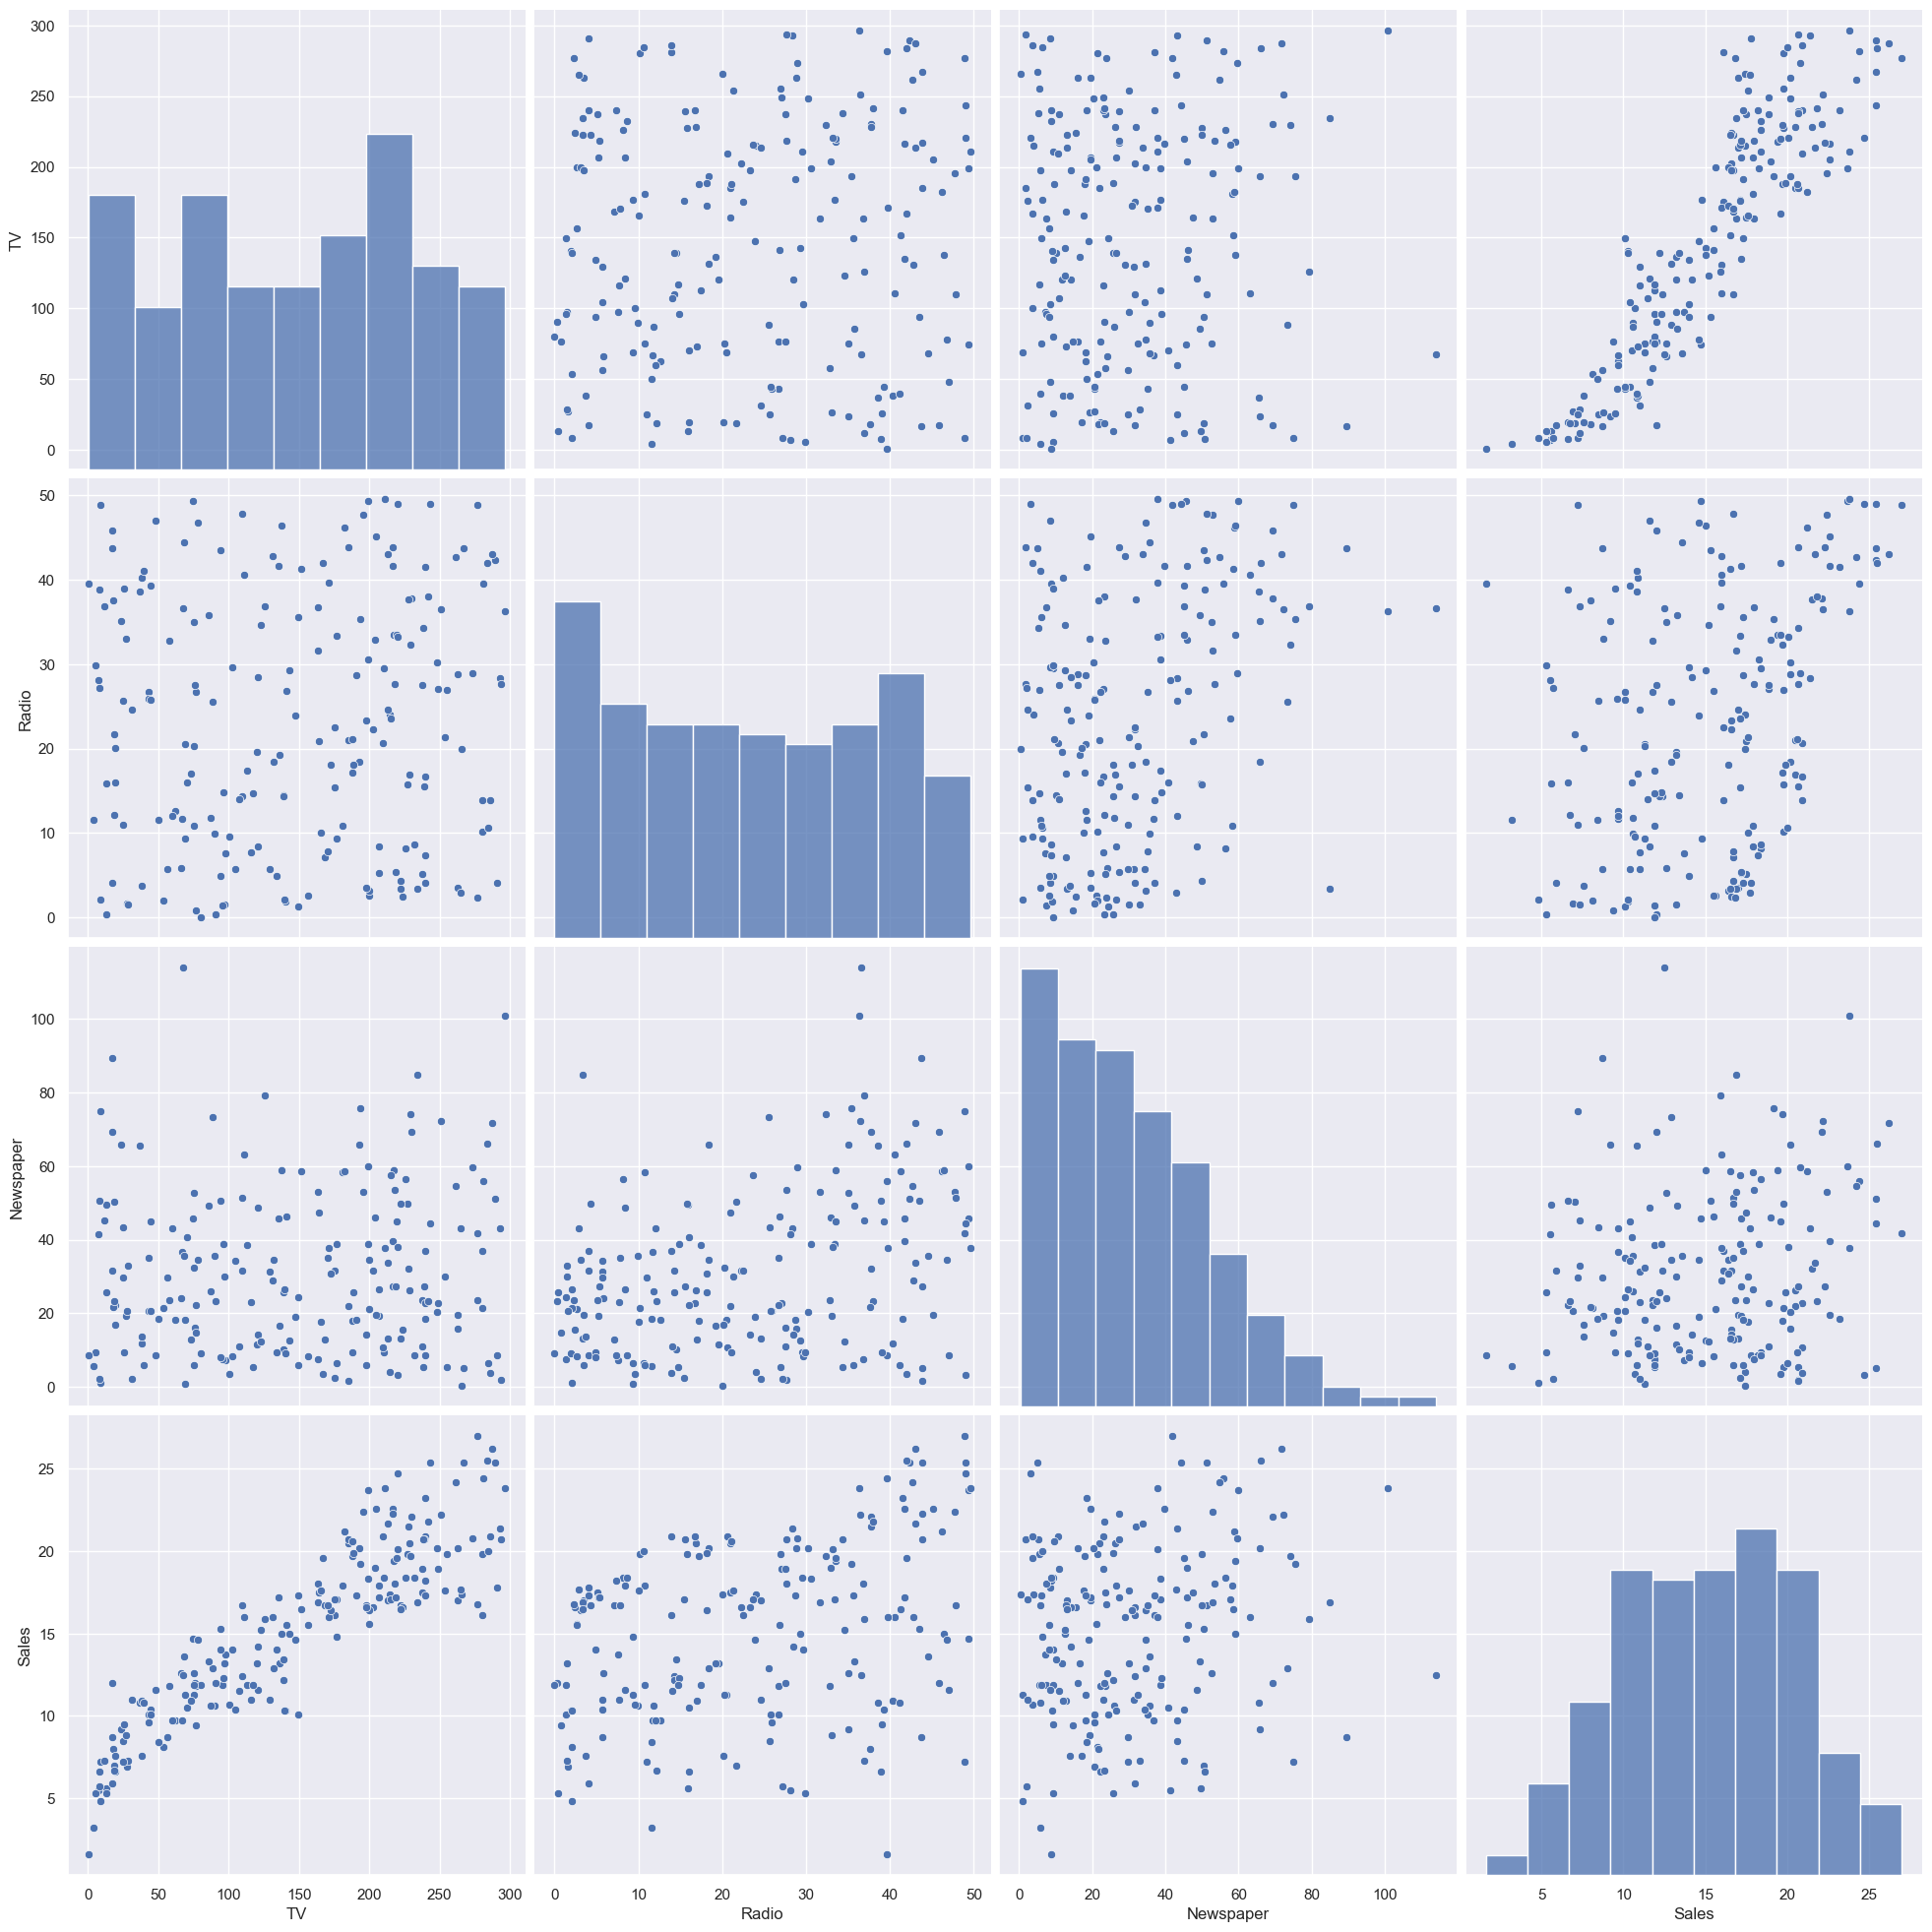

In [38]:
sns.pairplot(df, size = 5)
plt.show()

<AxesSubplot:>

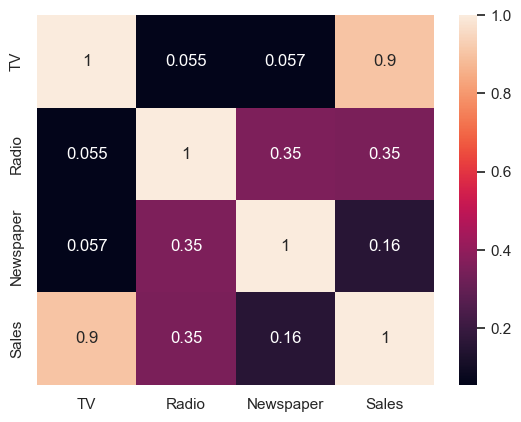

In [43]:
sns.heatmap(df.corr(), annot = True)

TV most correlated with Sales.

In [44]:
x = df.drop(columns = 'Sales', axis = 1)
x.sample()

,TV,Radio,Newspaper
89,109.8,47.8,51.4


In [47]:
y = df["Sales"]
y.sample()

35    17.8
Name: Sales, dtype: float64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 6)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [52]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
traning_data_prediction = lr.predict(x_train) 

In [55]:
r2_train = metrics.r2_score(y_train, traning_data_prediction)
print("R square value for train data : ", r2_train)

R square value for train data :  0.8994823640799331


In [56]:
testing_data_prediction = lr.predict(x_test) 

r2_train = metrics.r2_score(y_test, testing_data_prediction)
print("R square value for test data : ", r2_train)

R square value for test data :  0.917316578774934


In [64]:
input_data = (76.4, 26.7, 22.3)
input_array = np.asarray(input_data).reshape(1, -1)
data_prediction = lr.predict(input_array) 
data_prediction

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.6080125])